## dataframe

#### Другий рівень \(ускладнений\)

###### Професійний Data scientist має вміти працювати з різнотипними датасетами, обробляти їх, візуалізувати та знаходити закономірності. Тому першим кроком є вибір датасету. Пропонуємо для подальших робіт вибрати датасет, що вам сподобається, із архіву https://archive.ics.uci.edu/ml/index.php/

#### Датасет має відповідати таким вимогам:
     Data Set Characteristics: Multivariate
     Attribute Characteristics: Categorical, Integer, Real
     Number of Attributes: at least 2 integers/real
     Missing Values? YES!!!!!
1. Поборотися із зниклими даними. Для цього в допомогу вам Медіум
(https://towardsdatascience.com/how-to-handle-missing-data-
8646b18db0d4).
2. Пронормувати вибраний датасет або стандартизувати його
(нормалізація і стандартизація мають бути реалізовані як окремі
4
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).
3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
4. Збудувати графік залежності одного integer/real атрибута від іншого.
5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real
атрибутів.


Було обрано датасет:
[[https://archive.ics.uci.edu/dataset/381/beijing\+pm2\+5\+data](https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data) ](https://archive.ics.uci.edu/dataset/9/auto+mpg)


In [5]:
#Імпортуємо бібліотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.impute import SimpleImputer


In [6]:
# Зчитування набору даних у DataFrame
data = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv", na_values='NA', skipinitialspace=True)

In [7]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [8]:
print("Our data has following data types: \n", data.dtypes)

Our data has following data types: 
 No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object


##### Поборотися із зниклими даними. Для цього в допомогу вам Медіум (https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4).

###### Перевіряємо які данні мають Missing Values

In [9]:
#Рядки, які містять будь-які пропущені значення
data[data.isnull().any(axis=1)]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43548,43549,2014,12,20,12,NaN,-18,0.0,1030.0,NW,244.97,0,0
43549,43550,2014,12,20,13,NaN,-19,1.0,1029.0,NW,249.89,0,0
43550,43551,2014,12,20,14,NaN,-20,1.0,1029.0,NW,257.04,0,0
43551,43552,2014,12,20,15,NaN,-20,2.0,1028.0,NW,262.85,0,0


In [10]:
# Перевірка на наявність значень NaN
nan_values = data.isnull().sum()

# Виведення стовпців з пропущеними значеннями
print("Columns with NaN values:")
print(nan_values[nan_values > 0])

Columns with NaN values:
pm2.5    2067
dtype: int64


###### Solution 1: Impute with median



In [11]:
# Ініціалізація SimpleImputer зі стратегією 'median'
imputer = SimpleImputer(strategy='median')
imputer.fit(data[["pm2.5"]])
pm25_imputed = pd.DataFrame(imputer.transform(data[["pm2.5"]]), columns=["pm2.5"])
data_imputed = data.copy()

# Замінювання пропущених значень у стовпці "pm2.5" на імпутовані значення
data_imputed["pm2.5"] = pm25_imputed["pm2.5"].astype(data["pm2.5"].dtype)

In [12]:
data_imputed

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,72.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,72.0,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,72.0,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,72.0,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,72.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [13]:
# Перевірка наявності пропущених значень після імпутації
data_imputed[data_imputed.isnull().any(axis=1)]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir


###### Solution 2: drop na

In [14]:
data_drop_na = data.dropna().reset_index(drop=True)
data_drop_na 

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41752,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
41753,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
41754,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
41755,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


###### Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

In [15]:
# Функція нормалізації стовпців
def normalize_columns(data, columns):
    normalized_data = data.copy()
    for column in columns:
        min_val = min(normalized_data[column])
        max_val = max(normalized_data[column])
        normalized_data[column] = (normalized_data[column] - min_val) / (max_val - min_val)
    return normalized_data

In [16]:
# Визначення числових стовпців
numerical_columns = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']
# Нормалізація даних
data_normalized = normalize_columns(data_imputed, numerical_columns)

In [17]:
data_normalized.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,0.097946,0.614960,0.515550,0.462685,0.040057,0.001953,0.005414
std,12651.043435,1.413842,3.448572,8.799425,6.922266,0.090574,0.212256,0.199977,0.186704,0.085466,0.028162,0.039330
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,0.031187,0.441176,0.344262,0.309091,0.002290,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,0.072435,0.617647,0.540984,0.454545,0.008408,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,0.132797,0.808824,0.688525,0.618182,0.036674,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


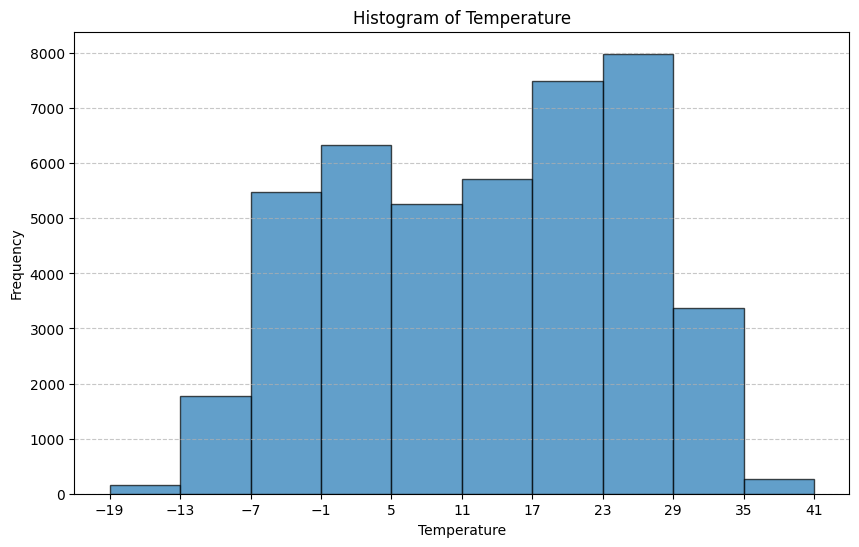

In [18]:
attribute = 'TEMP'

# Визначення кількості інтервалів і створення 10 рівновіддалених інтервалів
num_bins = 10
bins = range(int(data[attribute].min()), int(data[attribute].max()) + 1, int((data[attribute].max() - data[attribute].min()) / num_bins))

# Створення гістограми
plt.figure(figsize=(10, 6))
plt.hist(data[attribute], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

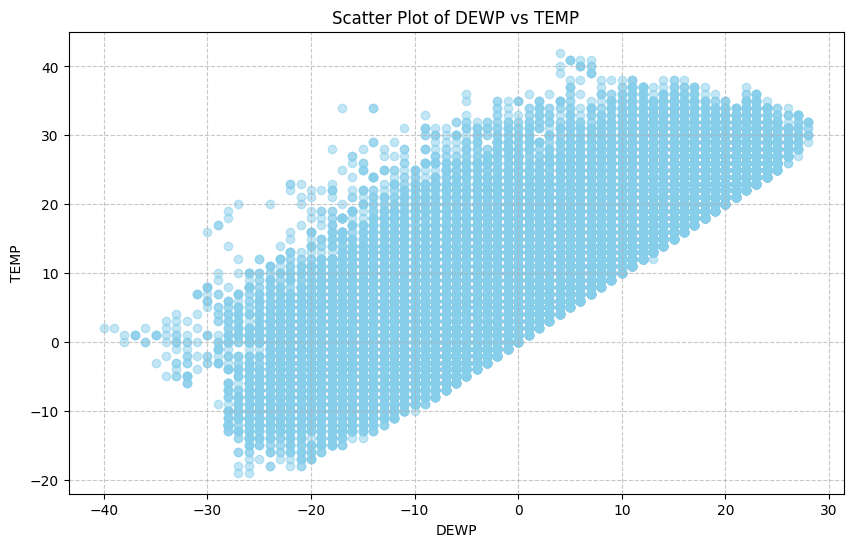

In [19]:
x_attribute = "DEWP" 
y_attribute = "TEMP"

# Створення діаграми розсіювання
plt.figure(figsize=(10, 6))
plt.scatter(data[x_attribute], data[y_attribute], color='skyblue', alpha=0.5)
plt.title('Scatter Plot of DEWP vs TEMP')
plt.xlabel('DEWP')
plt.ylabel('TEMP')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [20]:
# Обчислення коефіцієнта кореляції Пірсона
pearson_corr, _ = pearsonr(data[x_attribute], data[y_attribute])

# Обчислення коефіцієнта кореляції Спірмена
spearman_corr, _ = spearmanr(data[x_attribute], data[y_attribute])

print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Spearman correlation coefficient: {spearman_corr}")

Pearson correlation coefficient: 0.824633089178856
Spearman correlation coefficient: 0.8243869739345232


In [21]:
categorical_attribute = 'cbwd'
# Виконання One Hot Encoding
one_hot_encoded_data = pd.get_dummies(data, columns=[categorical_attribute])

In [22]:
one_hot_encoded_data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1.79,0,0,False,True,False,False
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,4.92,0,0,False,True,False,False
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,6.71,0,0,False,True,False,False
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,9.84,0,0,False,True,False,False
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,12.97,0,0,False,True,False,False


#### Visualization



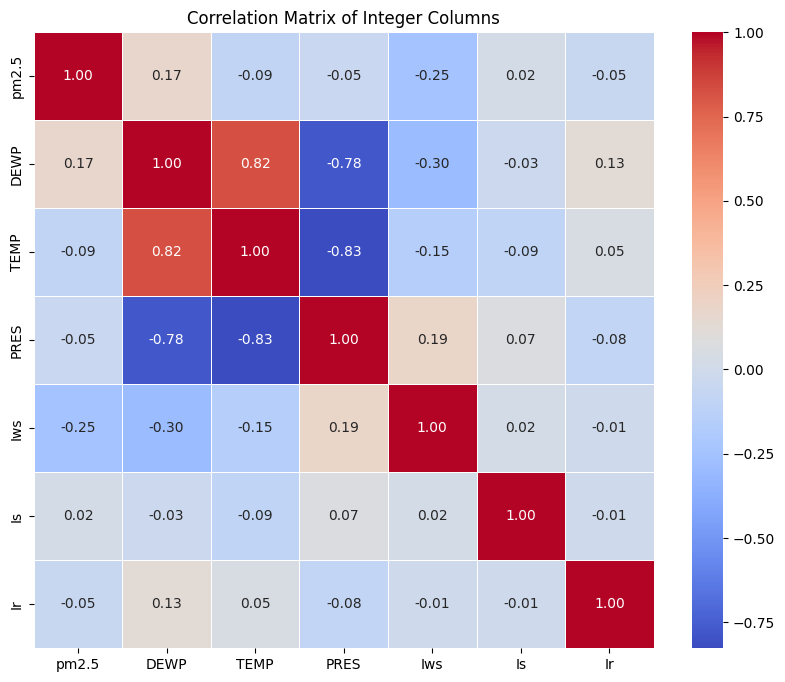

In [23]:
# Обчислення кореляційної матриці
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
# Побудова кореляційної матриці за допомогою теплової карти Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Integer Columns")
plt.show()

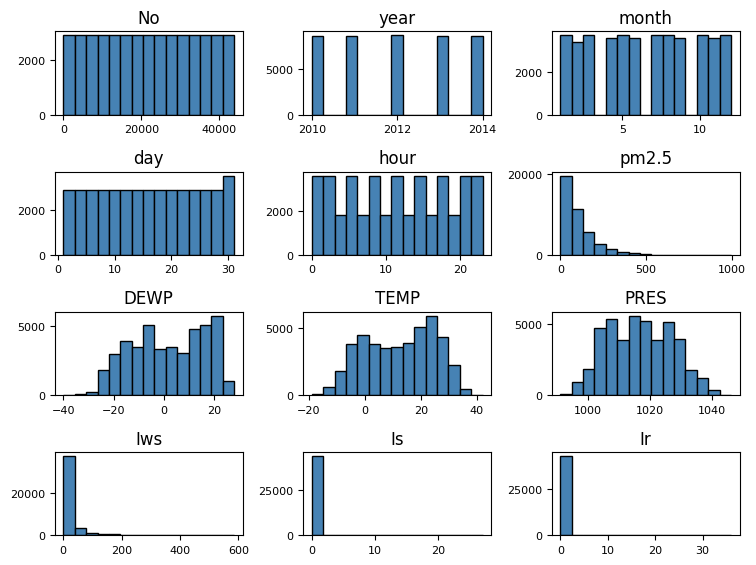

In [24]:
# Створення гістограм для кожного стовпця даних
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

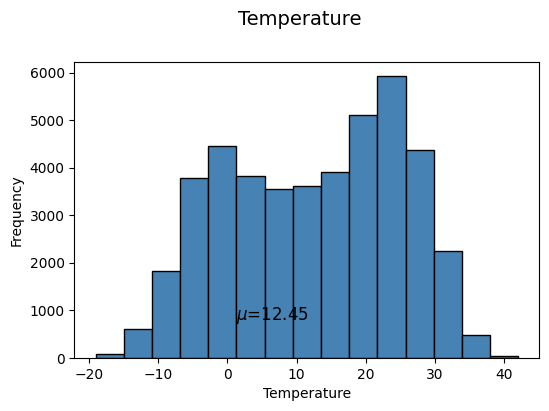

In [25]:
# Створення гістограми з підписами
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Temperature", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(data['TEMP'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(data['TEMP'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

C:\Users\dasha\AppData\Local\Temp\ipykernel_7292\1051201399.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['TEMP'], ax=ax1, shade=True, color='steelblue')


<Axes: xlabel='Temperature', ylabel='Density'>

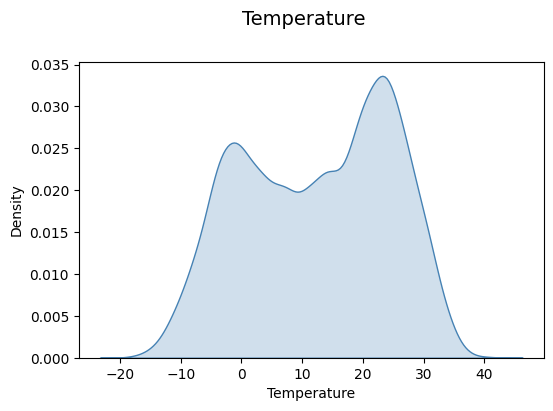

In [26]:
# Створення графіку щільності ймовірності
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Temperature", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Density") 
sns.kdeplot(data['TEMP'], ax=ax1, shade=True, color='steelblue')

Text(0.5, 0, 'Pres')

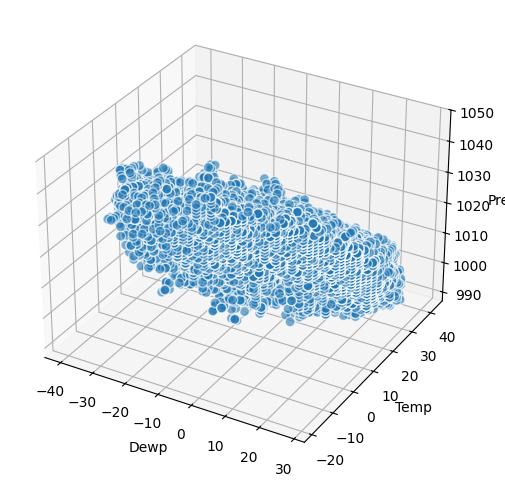

In [27]:
# Побудова 3D діаграми розсіювання
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = data['DEWP']
ys = data['TEMP']
zs = data['PRES']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Dewp')
ax.set_ylabel('Temp')
ax.set_zlabel('Pres')

#### Regression models



In [28]:
#Імпортуємо бібліотеки
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
x_attribute = 'DEWP'
y_attribute = 'TEMP'

data1, data2 = train_test_split(data_normalized, test_size=0.5, random_state=42)
                                
X_train = data1[[x_attribute]]
y_train = data1[y_attribute]

X_test = data2[[x_attribute]]
y_test = data2[y_attribute]


In [30]:
# Ініціалізація моделей регресії
models = [LinearRegression(), Ridge(), ElasticNet()]

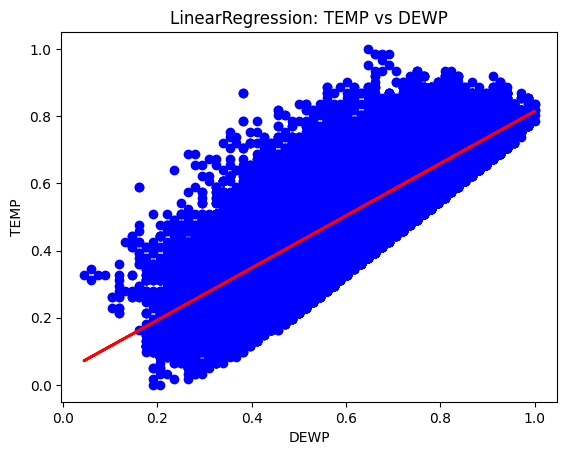

Mean Squared Error for LinearRegression: 0.012818428759937607


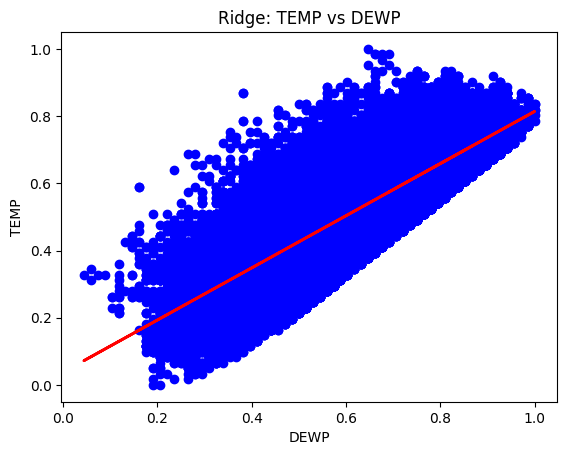

Mean Squared Error for Ridge: 0.01281842625167006


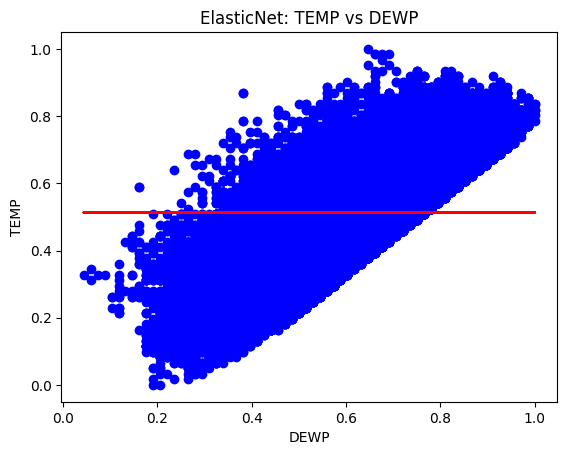

Mean Squared Error for ElasticNet: 0.03979296528094231


In [31]:
for model in models:
    model.fit(data1[[x_attribute]], data1[y_attribute])
    y_pred = model.predict(data2[[x_attribute]])

    #Побудова графіку прогнозів
    plt.scatter(data2[x_attribute], data2[y_attribute], color='blue')
    plt.plot(data2[x_attribute], y_pred, color='red', linewidth=2)
    plt.title(type(model).__name__ + ': ' + y_attribute + ' vs ' + x_attribute)
    plt.xlabel(x_attribute)
    plt.ylabel(y_attribute)
    plt.show()

    # Обчислення середньоквадратичної похибки
    mse = mean_squared_error(data2[y_attribute], y_pred)
    print("Mean Squared Error for {}: {}".format(type(model).__name__, mse))